In [ ]:
import pandas as pd #importing the pandas library
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt
import numpy as np


<div class="alert alert-block alert-warning">

## 1- Getting the data: Titanic dataset & first sanity checks

* 1.1 Load the dataset into a DataFrame <i>df_titanic</i>.

* 1.2 Missing values: where does the data break?</div>


In [ ]:
# 1.1

df_titanic = pd.read_csv("titanic.csv")


In [ ]:
# 1.2

df_titanic.isnull().sum()


Unnamed: 0        0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

<div class="alert alert-block alert-warning">

## 2- Fixing missing ages: two simple imputation strategies

Three columns have missing values the most: "Age", "Cabin", and "Survived". 
Cabin misses approx. 80% of its values and is not the right candidate for simple imputation approaches.
We focus on the <strong>Age</strong> column, where about 20% of the entries are missing.

* 2.1 Strategy A: Mean imputation "Age_imp_mean".

* 2.2 Strategy B: Forward fill "Age_imp_ffill".

* 2.3 How the imputation changes the distribution (histograms)

* 2.4 Outliers & spread after imputation (boxplots)

* 2.5 Reading a boxplot like a story (median, IQR, whiskers, outliers)

* 2.6 What we learned: which method distorts the analysis more?
    
</div>


In [ ]:
# 2.1
df_titanic["Age_imp_mean"]= df_titanic.Age.fillna(df_titanic["Age"].mean())

df_titanic.Age_imp_mean

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age_imp_mean, Length: 1309, dtype: float64

In [ ]:
# 2.2

df_titanic["Age_imp_ffill"]= df_titanic.Age.fillna(method="ffill")
df_titanic.Age_imp_ffill

/var/folders/hs/v3rv3f714391byj_w2dh_q980000gn/T/ipykernel_73174/3548479612.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_titanic["Age_imp_ffill"]= df_titanic.Age.fillna(method="ffill")


0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    38.5
1308    38.5
Name: Age_imp_ffill, Length: 1309, dtype: float64

<Figure size 640x480 with 0 Axes>

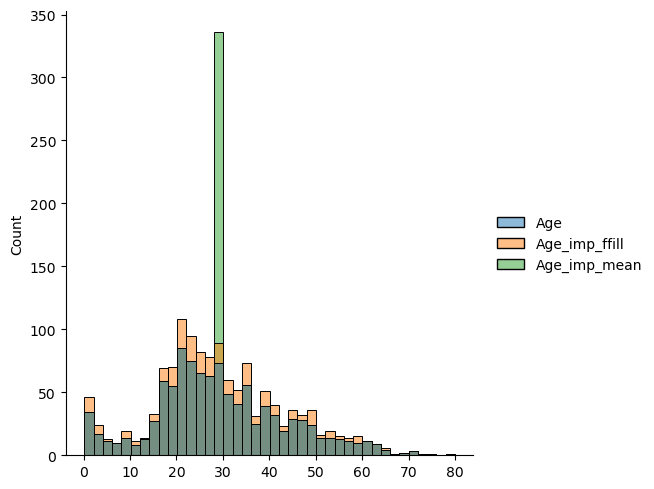

In [ ]:
# 2.3
plt.figure(1)

sns.displot([df_titanic.Age, df_titanic.Age_imp_ffill, df_titanic.Age_imp_mean], kde = False, bins = 40)

<Axes: >

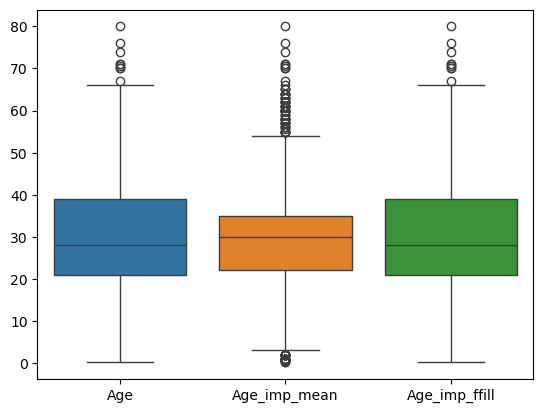

In [ ]:
# 2.4
plt.figure(2)

sns.boxplot(data=[df_titanic.Age, df_titanic.Age_imp_mean, df_titanic.Age_imp_ffill])

In [ ]:
# 2.5
"""
1. Horizontal lines of each column within the colored area represent the mean of the respective columns.
2. Width of colored area is called IQR(Interquartile Range). 
There is a formula to obtain this value. 
At first, we calculate the median of the whole array. This is the Q2.
Then we cut the whole array in half and take the medians from upper(Q3) and lower(Q1) halves. 
Finally we have IQR = Q3 - Q1.

This width area represents the middle 50% of the data from respective columns.
3. In boxplots, we have 2 whiskers. The lower one represents the numbers between the minimum value in the column and Q1(Lower Quartile).
The higher whisker represents the numbers between Q3(Upper Quartile) and the maximum value in the column. 
4. There are 2 formula to obtain the minimum and maximum of the boxplot. 

min = Q1 - 1.5 * IQR

max = Q3 + 1.5 * IQR

Any numbers less than min or greater than max are considered as outliers which stay above and below the whisker.

"""

'\n1. Horizontal lines of each column within the colored area represent the mean of the respective columns.\n2. Width of colored area is called IQR(Interquartile Range). \nThere is a formula to obtain this value. \nAt first, we calculate the median of the whole array. This is the Q2.\nThen we cut the whole array in half and take the medians from upper(Q3) and lower(Q1) halves. \nFinally we have IQR = Q3 - Q1.\n\nThis width area represents the middle 50% of the data from respective columns.\n3. In boxplots, we have 2 whiskers. The lower one represents the numbers between the minimum value in the column and Q1(Lower Quartile).\nThe higher whisker represents the numbers between Q3(Upper Quartile) and the maximum value in the column. \n4. There are 2 formula to obtain the minimum and maximum of the boxplot. \n\nmin = Q1 - 1.5 * IQR\n\nmax = Q3 + 1.5 * IQR\n\nAny numbers less than min or greater than max are considered as outliers which stay above and below the whisker.\n\n'

In [ ]:
# 2.6
"""
1. As a matter of fact, we changed the null values of age with the mean values of age in the column. As a result, the number of passengers
with the mean age grows dramatically. That is why the survival rate of this age bracket is not reliable. 

2. I filled up the missing values of age with 2 methods. One was fillna which fills the null values with the mean value of the age column. 
On the other hand, we used ffill method which fills up missing values by the preceding value. 

When I used the fillna, that concentrated more values in the middle which is closed to the median. That makes more outliers on the 
both sides outside of whiskers.

When I used the ffill method, it yielded less outliers as it fills up more values with existing and preceding age data. Therefore, 
the numbers are not concentrated in the middle. That's why it has less outliers in both sides. 

"""

"\n1. As a matter of fact, we changed the null values of age with the mean values of age in the column. As a result, the number of passengers\nwith the mean age grows dramatically. That is why the survival rate of this age bracket is not reliable. \n\n2. We filled up the missing values of age with 2 methods. One was fillna which fills the null values with the mean value of the age column. \nOn the other hand, we used ffill method which fills up missing values by the preceding value. \n\nWhen we used the fillna, that concentrated more values in the middle which is closed to the median. That makes more outliers on the \nboth sides outside of whiskers.\n\nWhen we used the ffill method, it yielded less outliers as it fills up more values with existing and preceding age data. Therefore, \nthe numbers are not concentrated in the middle. That's why it has less outliers in both sides. \n\n"

<div class="alert alert-block alert-warning">

## 3- EDA: Who survived — and why?
The Titanic disaster is a well-known case where survival was not purely random. In this section, I explore which groups had higher survival rates using visual analysis (Age, Fare, Sex, and Pclass). Dataset source: Kaggle Titanic competition from https://www.kaggle.com/c/titanic.


First lets explore the data a bit further:
* 3.1 Age vs Fare vs Survival (split by Sex)

* 3.2 Fare by passenger class (Pclass) and Sex

* 3.3 Survival rate by Pclass and Sex

</div>

'\nWrite your answer to the question here.\n\n4.1 Age is not necessarily correlated to fare according to the figures we obtain. In general, we see the survival rate is higher for \nfemales than the males despite of the age and fare. The higher fare is correlated with the higher survival rate of females. \nOn the contrary, there is no strong evidence to prove the same for the males.\nOn a broad sense, we can say there is some correlation between higher fare and survival rate, but this is not always true.\n\n'

<Figure size 640x480 with 0 Axes>

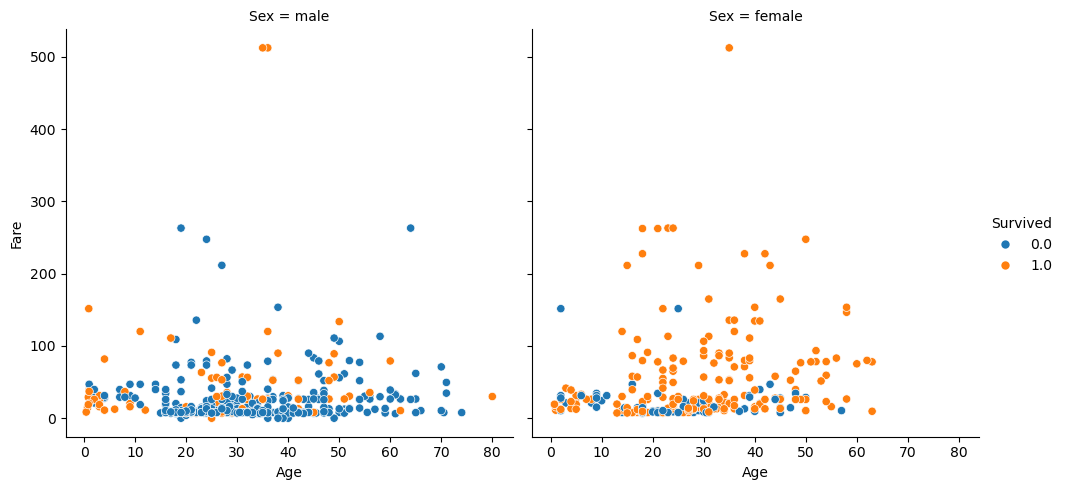

In [ ]:
# 3.1
plt.figure(3)

sns.relplot(data=df_titanic, x="Age", y="Fare", hue="Survived", col="Sex", kind="scatter")

"""
Age is not necessarily correlated to fare according to the figures we obtain. In general, we see the survival rate is higher for 
females than the males despite of the age and fare. The higher fare is correlated with the higher survival rate of females. 
On the contrary, there is no strong evidence to prove the same for the males.
On a broad sense, we can say there is some correlation between higher fare and survival rate, but this is not always true.
"""

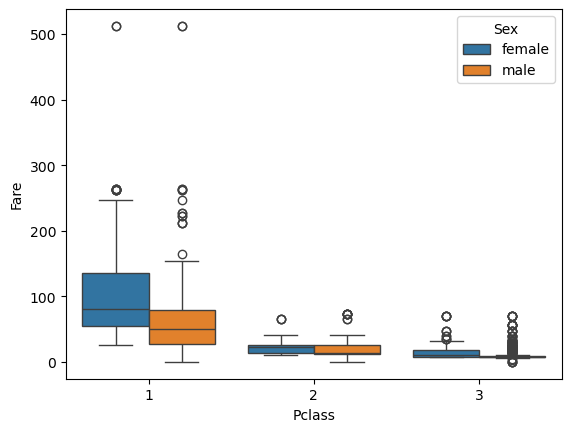

'\nWrite your answer to the question here.\n\nFor the 1st class, we see extreme outliers(>500).\nThe most unusual finding is 3rd class passengers paid much more fare for the same class despite of the sex. \n\n'

In [ ]:
# 3.2
plt.figure(5)
sns.boxplot(data=df_titanic, x="Pclass", y="Fare", hue="Sex")

plt.show()


"""
For the 1st class, we see extreme outliers(>500).
The most unusual finding is 3rd class passengers paid much more fare for the same class despite of the sex. 
"""

'\nAs the barplots show, despite of the class, the survival rate of females is always higher than the poor males. Although we can observe that \nthe males from first class has more chance of surviving.\n'

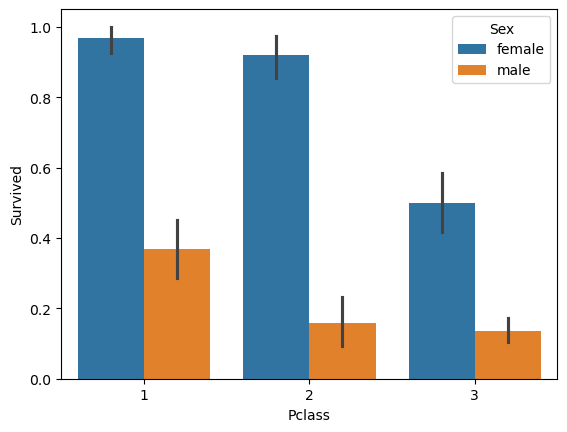

In [ ]:
# 3.3
plt.figure(6)
sns.barplot(df_titanic, x="Pclass", y="Survived", hue="Sex")


"""
As the barplots show, despite of the class, the survival rate of females is always higher than the poor males. Although we can observe that 
the males from first class has more chance of surviving.
"""

<div class="alert alert-block alert-warning">

## 4- Children first? Testing the ‘Women and children first’ narrative

Survival seems to be correlated with the passenger class. Looking at the plot of 4.3, something is unusual about the survival rate of female passengers in the third class. But first, lets look at the survival rate of children, passengers under the age of 14.

* 4.1 Children first? Survival patterns for kids (Age < 14)
* 4.2 Adults: survival patterns across classes (split by Sex)
* 4.3 Survival patterns for children across classes (Pclass)
* 4.4 Interpretation: class location, lifeboats, and access to the boat deck

</div>

"\nWe see that the survival rate of children from 1st and 2nd class is almost 100%. Although there was no survived girl child in 1st class \naccording to the valid data we have. To verify, we checked the dataset and we observed there was one female child with age 2 in 1st class\nand she didn't survive. \n\nThe survival rate of children from 3rd class is much less than the other classes. Although the female survival rate in this class is higher \nthan the male children.\n\nHowever, the survival column has one of the highest null values. Also, it is not possible to impute this data. So, we can assume that with \nthe existing data, there is no way to obtain a deterministic result. Instead of imputating, we can have extra data/insight for the passengers\nwho have no data for survival situation.\n\n"

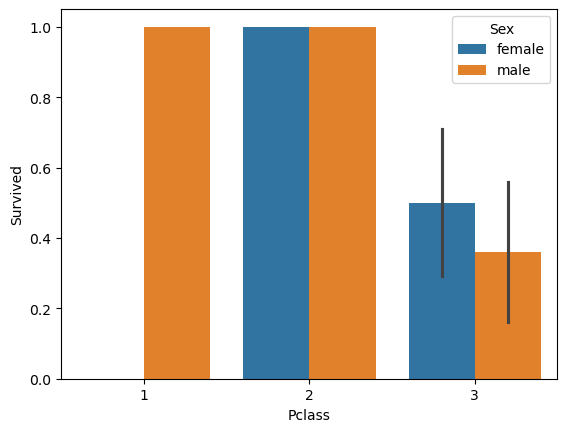

In [ ]:
# 4.1
plt.figure(7)
kids = df_titanic[df_titanic["Age"] < 14]

sns.barplot(kids, x="Pclass", y="Survived", hue="Sex")

"""
I see that the survival rate of children from 1st and 2nd class is almost 100%. Although there was no survived girl child in 1st class 
according to the valid data we have. To verify, I checked the dataset and observed there was one female child with age 2 in 1st class
and she didn't survive. 

The survival rate of children from 3rd class is much less than the other classes. Although the female survival rate in this class is higher 
than the male children.

However, the survival column has one of the highest null values. Also, it is not possible to impute this data. So, we can assume that with 
the existing data, there is no way to obtain a deterministic result. Instead of imputating, we can have extra data/insight for the passengers
who have no data for survival situation.

"""

'\nYour answer to the question here.\n\nAgain, poor men!\n\nThe barplot shows that, generally despite of the passenger class, females have a higher survival rate than their male counterparts. \n\nAlso, we see that higher the class, higher the survival rate for females. \n\nBut for the males, it does not follow the same. The 1st class male passengers have the highest among all classes. Then the 3rd class male\npassengers have little higher rate than the 2nd class male passengers.\n'

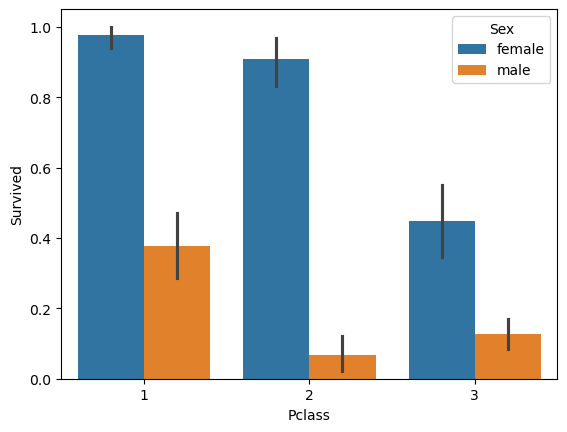

In [ ]:
# 4.2
plt.figure(8)
adults = df_titanic[df_titanic["Age"] >= 14]

sns.barplot(adults, x="Pclass", y="Survived", hue="Sex")

"""
Again, poor men!

The barplot shows that, generally despite of the passenger class, females have a higher survival rate than their male counterparts. 

Also, we see that higher the class, higher the survival rate for females. 

But for the males, it does not follow the same. The 1st class male passengers have the highest among all classes. Then the 3rd class male
passengers have little higher rate than the 2nd class male passengers.
"""

<Axes: xlabel='Pclass', ylabel='count'>

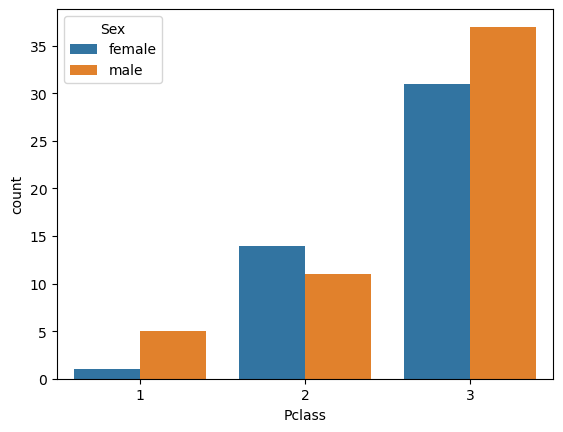

In [ ]:
# 4.3
plt.figure(9)

sns.countplot(kids, x = "Pclass", hue = "Sex")

In [ ]:
# 4.4
"""
Yes, "Women and children first" applies to the 3rd class as well as the others. 

When I considered the plan of ship I noticed that the boat deck is uppermost deck that housed lifeboats and other stuff. 
The third class cabins were in the lower and middle deck. So, the first and second class can access the boat deck much easier than the 
third class, based on their location. Also, there were insufficient lifeboats for rescuing all the passengers. As a matter of fact, only 
half of the people were able to be rescued by the available lifeboats.
 
"""

'\nYour answer to the question here.\n\nYes, "Women and children first" applies to the 3rd class as well as the others. \n\nWhen we considered the plan of ship we noticed that the boat deck is uppermost deck that housed lifeboats and other stuff. \nThe third class cabins were in the lower and middle deck. So, the first and second class can access the boat deck much easier than the \nthird class, based on their location. Also, there were insufficient lifeboats for rescuing all the passengers. As a matter of fact, only \nhalf of the people were able to be rescued by the available lifeboats.\n \n'

<div class="alert alert-block alert-warning">

## 5- Deck matters: extracting meaning from Cabin data


Most of the lifeboats where on Deck A. Lets investigate the implication for the survival of the passengers.
As we have seen, most of the cabin data is missing. Nonetheless, lets see if we can still extract some information.

* 5.1 How much Cabin data is missing per class?

It seems the first class only has about 20% missing values! Lets continue our investigation!

* 5.2 Keep only passengers with known Cabin

* 5.3 Feature engineering: Cabin → Deck/Level (first letter)
    
* 5.4 Fare by deck for first-class passengers

* 5.5 Survival rate by deck (is Deck A unusual?)

* 6.6 Gender mix by deck: does it explain the survival pattern?



</div>

In [ ]:
# 5.1

print(df_titanic["Cabin"].isnull().groupby(df_titanic["Pclass"]).value_counts(normalize=True) * 100)

Pclass  Cabin
1       False    79.256966
        True     20.743034
2       True     91.696751
        False     8.303249
3       True     97.743300
        False     2.256700
Name: proportion, dtype: float64


In [ ]:
# 5.2
df_titanic_nona = df_titanic.dropna(subset=["Cabin"])

df_titanic_nona


,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_imp_mean,Age_imp_ffill
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,38.0,38.0
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,35.0,35.0
6,6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,54.0,54.0
10,10,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,4.0,4.0
11,11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,404,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,43.0,43.0
1296,405,20.0,D38,C,13.8625,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,1297,2,male,0,NaN,SC/PARIS 2166,20.0,20.0
1298,407,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,50.0,50.0
1302,411,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,37.0,37.0


In [ ]:
# 5.3
df_titanic_nona = df_titanic.dropna(subset=["Cabin"]).copy()
df_titanic_nona["Level"] = df_titanic_nona["Cabin"].str.slice(0, 1)
df_titanic_nona

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_imp_mean,Age_imp_ffill,Level
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,38.0,38.0,C
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,35.0,35.0,C
6,6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,54.0,54.0,E
10,10,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,4.0,4.0,G
11,11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,58.0,58.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,404,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,43.0,43.0,D
1296,405,20.0,D38,C,13.8625,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,1297,2,male,0,NaN,SC/PARIS 2166,20.0,20.0,D
1298,407,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,50.0,50.0,C
1302,411,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,37.0,37.0,C


'\nYour answer to the question here.\nLevel A shows the lowest average fare. It does not make any sense because it belongs to the 1st class and the location is prime(middle/safest\nplace of the ship)\n\n'

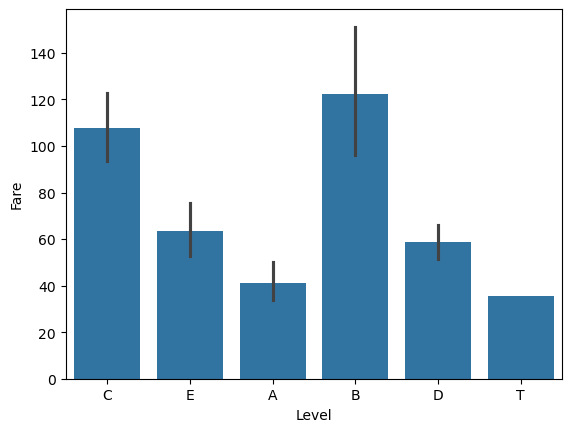

In [ ]:
# 5.4
plt.figure(10)

firstClass = df_titanic_nona[df_titanic_nona["Pclass"] == 1]

sns.barplot(firstClass, x="Level", y="Fare")


"""
Level A shows the lowest average fare. It does not make any sense because it belongs to the 1st class and the location is prime(middle/safest
place of the ship)

"""

'\nYour answer to the question here.\nSurvival rate by level barplots shows that level A has the lowest survival rate. Level B, E and D have almost the same and the highest \nat the same time. On the other hand, level C has lower than the B, E and D, but higher than A in terms of survival rate.\n\nThough the lifeboats were located in deck A, there was the least survival rate in level A of the 1st class.\n\n'

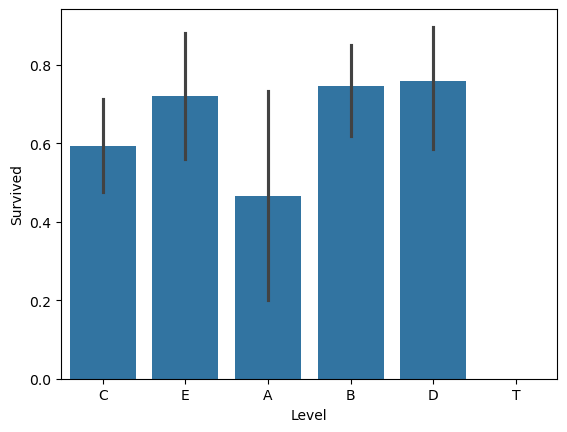

In [ ]:
# 5.5 
plt.figure(11)
sns.barplot(firstClass, x="Level", y="Survived")


"""
Survival rate by level barplots shows that level A has the lowest survival rate. Level B, E and D have almost the same and the highest 
at the same time. On the other hand, level C has lower than the B, E and D, but higher than A in terms of survival rate.

Though the lifeboats were located in deck A, there was the least survival rate in level A of the 1st class.
"""

"\nYour answer to the question here.\n\nActually, Deck A had more male passengers. Since the priority was to rescue females and children, much poor men again didn't survive from \nthis deck.\n\nWe are sorry :( \n\n"

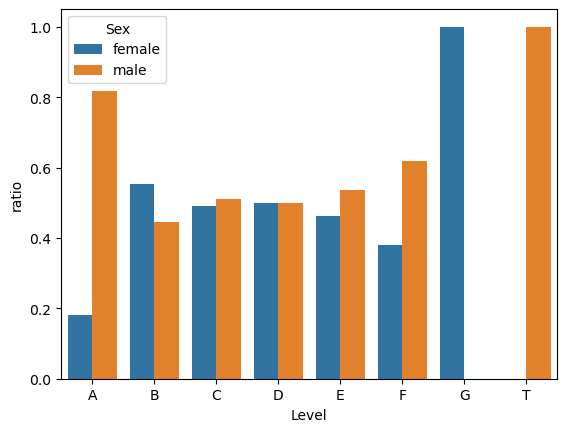

In [ ]:
# 5.6
plt.figure(12)

counts = df_titanic_nona.groupby(["Level", "Sex"]).size().reset_index(name="count")

totals = counts.groupby("Level")["count"].transform("sum")
counts["ratio"] = counts["count"] / totals

sns.barplot(data=counts, x="Level", y="ratio", hue="Sex")
"""
Actually, Deck A had more male passengers. Since the priority was to rescue females and children, much poor men again didn't survive from 
this deck.

We are sorry :( 

"""